# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 12 (Monday) 11:00 pm </b> </font>

<font color="blue"> Anonymous </font>


$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
$

# Introduction

Describe the objective of this assignment. You can briefly state how you accompilsh it.
In this assignment, we will be using implementing Linear Regression and use it on the Sberbank Russian Housing Market dataset to predict the price of the houses.
First, we will start by analysing the data and see if we can get insight into how the data is.
After that, we will be implementing the Linear Regression using 3 different ways.
1. Least Squares
2. Least Mean Squares<br>
a. Step Learning<br>
b. Batch Learning



# Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0. 

# Regression Data - Sberbank Russian Housing Market
<font color="red"> Introduction </font> Sberbank is the largest and oldest bank in Russia, which helps its customers by predicting the prices of real estate so that the renter's, buyer's of the house are confident enough while buying the house or leasing the house.
There are many features given in the dataset which includes housing data and also contains marcoeconomic data to make this data more encompassing and help to find relation between different feature set, but the ultimate aim is to predict the house price i.e a real valued continous value so this is the regression problem.

<font color="red"> Source of Data </font> Data was taken from Kaggle, original data consisted of train.csv, test.csv.
But for the purpose of visulization purpose of we will be just considering the train.csv

<font color='red'> Reading of Data </font> Having downloaded the data from the source, reading of the data can be done directly using the pandas package i.e. pandas provide a important API like read_csv, read_table, read_json where we can directly get the data from csv to the pandas dataframe. <b> The file name is 'sberbanktrain.csv', is available with the zip file. Place the csv in the same folder as the jupyter notebook. </b>



In [1]:
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Reading the data
housedf = pd.read_csv('sberbanktrain.csv')
#housedf = pd.read_csv('../datasets/Sberbank/sberbanktrain.csv')

In [2]:
#Lets look at the basic features like number of samples, columns in the dataset
#Also, we will see the number of numerical features and categorical features
print("Total samples {}".format(len(housedf)))
print("Total number of features {}".format(len(housedf.columns)))
print("Total number of numeric columns {}".format(housedf.select_dtypes(include=[np.number]).shape[1]))
print("Total number of categorical columns {}".format(housedf.select_dtypes(exclude=[np.number]).shape[1]))

Total samples 30471
Total number of features 292
Total number of numeric columns 276
Total number of categorical columns 16


In [3]:
#Now, lets see the basic information in the dataset like mean, std deviation which can be seen using the describe(),
#which will give the information for the numerical columns 
#We can see that the numerical values vary in large way, so we would need to standardize the values, so that ML models
#wont be baised towards a single feature.
#Also, from housedf.info() we can see that the dataset contains 292 enteries, out of which 119 are float64,
#157 are int64 and remainig 16 are object(i.e can be categorical or string)
print(housedf.info())
print(housedf.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB
None
                 id       full_sq       life_sq         floor     max_floor  \
count  30471.000000  30471.000000  24088.000000  30304.000000  20899.000000   
mean   15237.917397     54.214269     34.403271      7.670803     12.558974   
std     8796.501536     38.031487     52.285733      5.319989      6.756550   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7620.500000     38.000000     20.000000      3.000000      9.000000   
50%    15238.000000     49.000000     30.000000      6.500000     12.000000   
75%    22855.500000     63.000000     43.000000     11.000000     17.000000   
max    30473.000000   5326.000000   7478.000000     77.000000    117.000000   

           material    build_year      num_room      kitch_sq         state  \
count  20899.000000  1

In [4]:
#Now lets find the percent of missing values in the features of the data
#Important features like build_year, state(condition of the apartment), max_floor, num_room, kitch_sq which
#can impact target variable are missing, so we will have to take care for missing values
missing_housedf = (housedf.isnull().sum() / len(housedf)) * 100
missing_housedf = missing_housedf[missing_housedf > 0]
missing_housedf.sort_values(ascending=False, inplace=True)
print(missing_housedf)

hospital_beds_raion                      47.392603
build_year                               44.649011
state                                    44.498047
cafe_sum_500_min_price_avg               43.585704
cafe_sum_500_max_price_avg               43.585704
cafe_avg_price_500                       43.585704
max_floor                                31.413475
material                                 31.413475
num_room                                 31.413475
kitch_sq                                 31.413475
preschool_quota                          21.948738
school_quota                             21.938893
cafe_sum_1000_max_price_avg              21.410521
cafe_sum_1000_min_price_avg              21.410521
cafe_avg_price_1000                      21.410521
life_sq                                  20.947786
build_count_before_1920                  16.379508
build_count_block                        16.379508
raion_build_count_with_material_info     16.379508
build_count_wood               

price_doc           1.000000
num_room            0.476337
full_sq             0.341840
sport_count_5000    0.294864
sport_count_3000    0.290651
trc_count_5000      0.289371
sport_count_2000    0.278056
office_sqm_5000     0.269977
trc_sqm_5000        0.268072
sport_count_1500    0.258376
Name: price_doc, dtype: float64
detention_facility_km   -0.223061
office_km               -0.223429
basketball_km           -0.223462
stadium_km              -0.236924
nuclear_reactor_km      -0.257946
ttk_km                  -0.272620
bulvar_ring_km          -0.279158
kremlin_km              -0.279249
sadovoe_km              -0.283622
zd_vokzaly_avto_km      -0.284069
Name: price_doc, dtype: float64


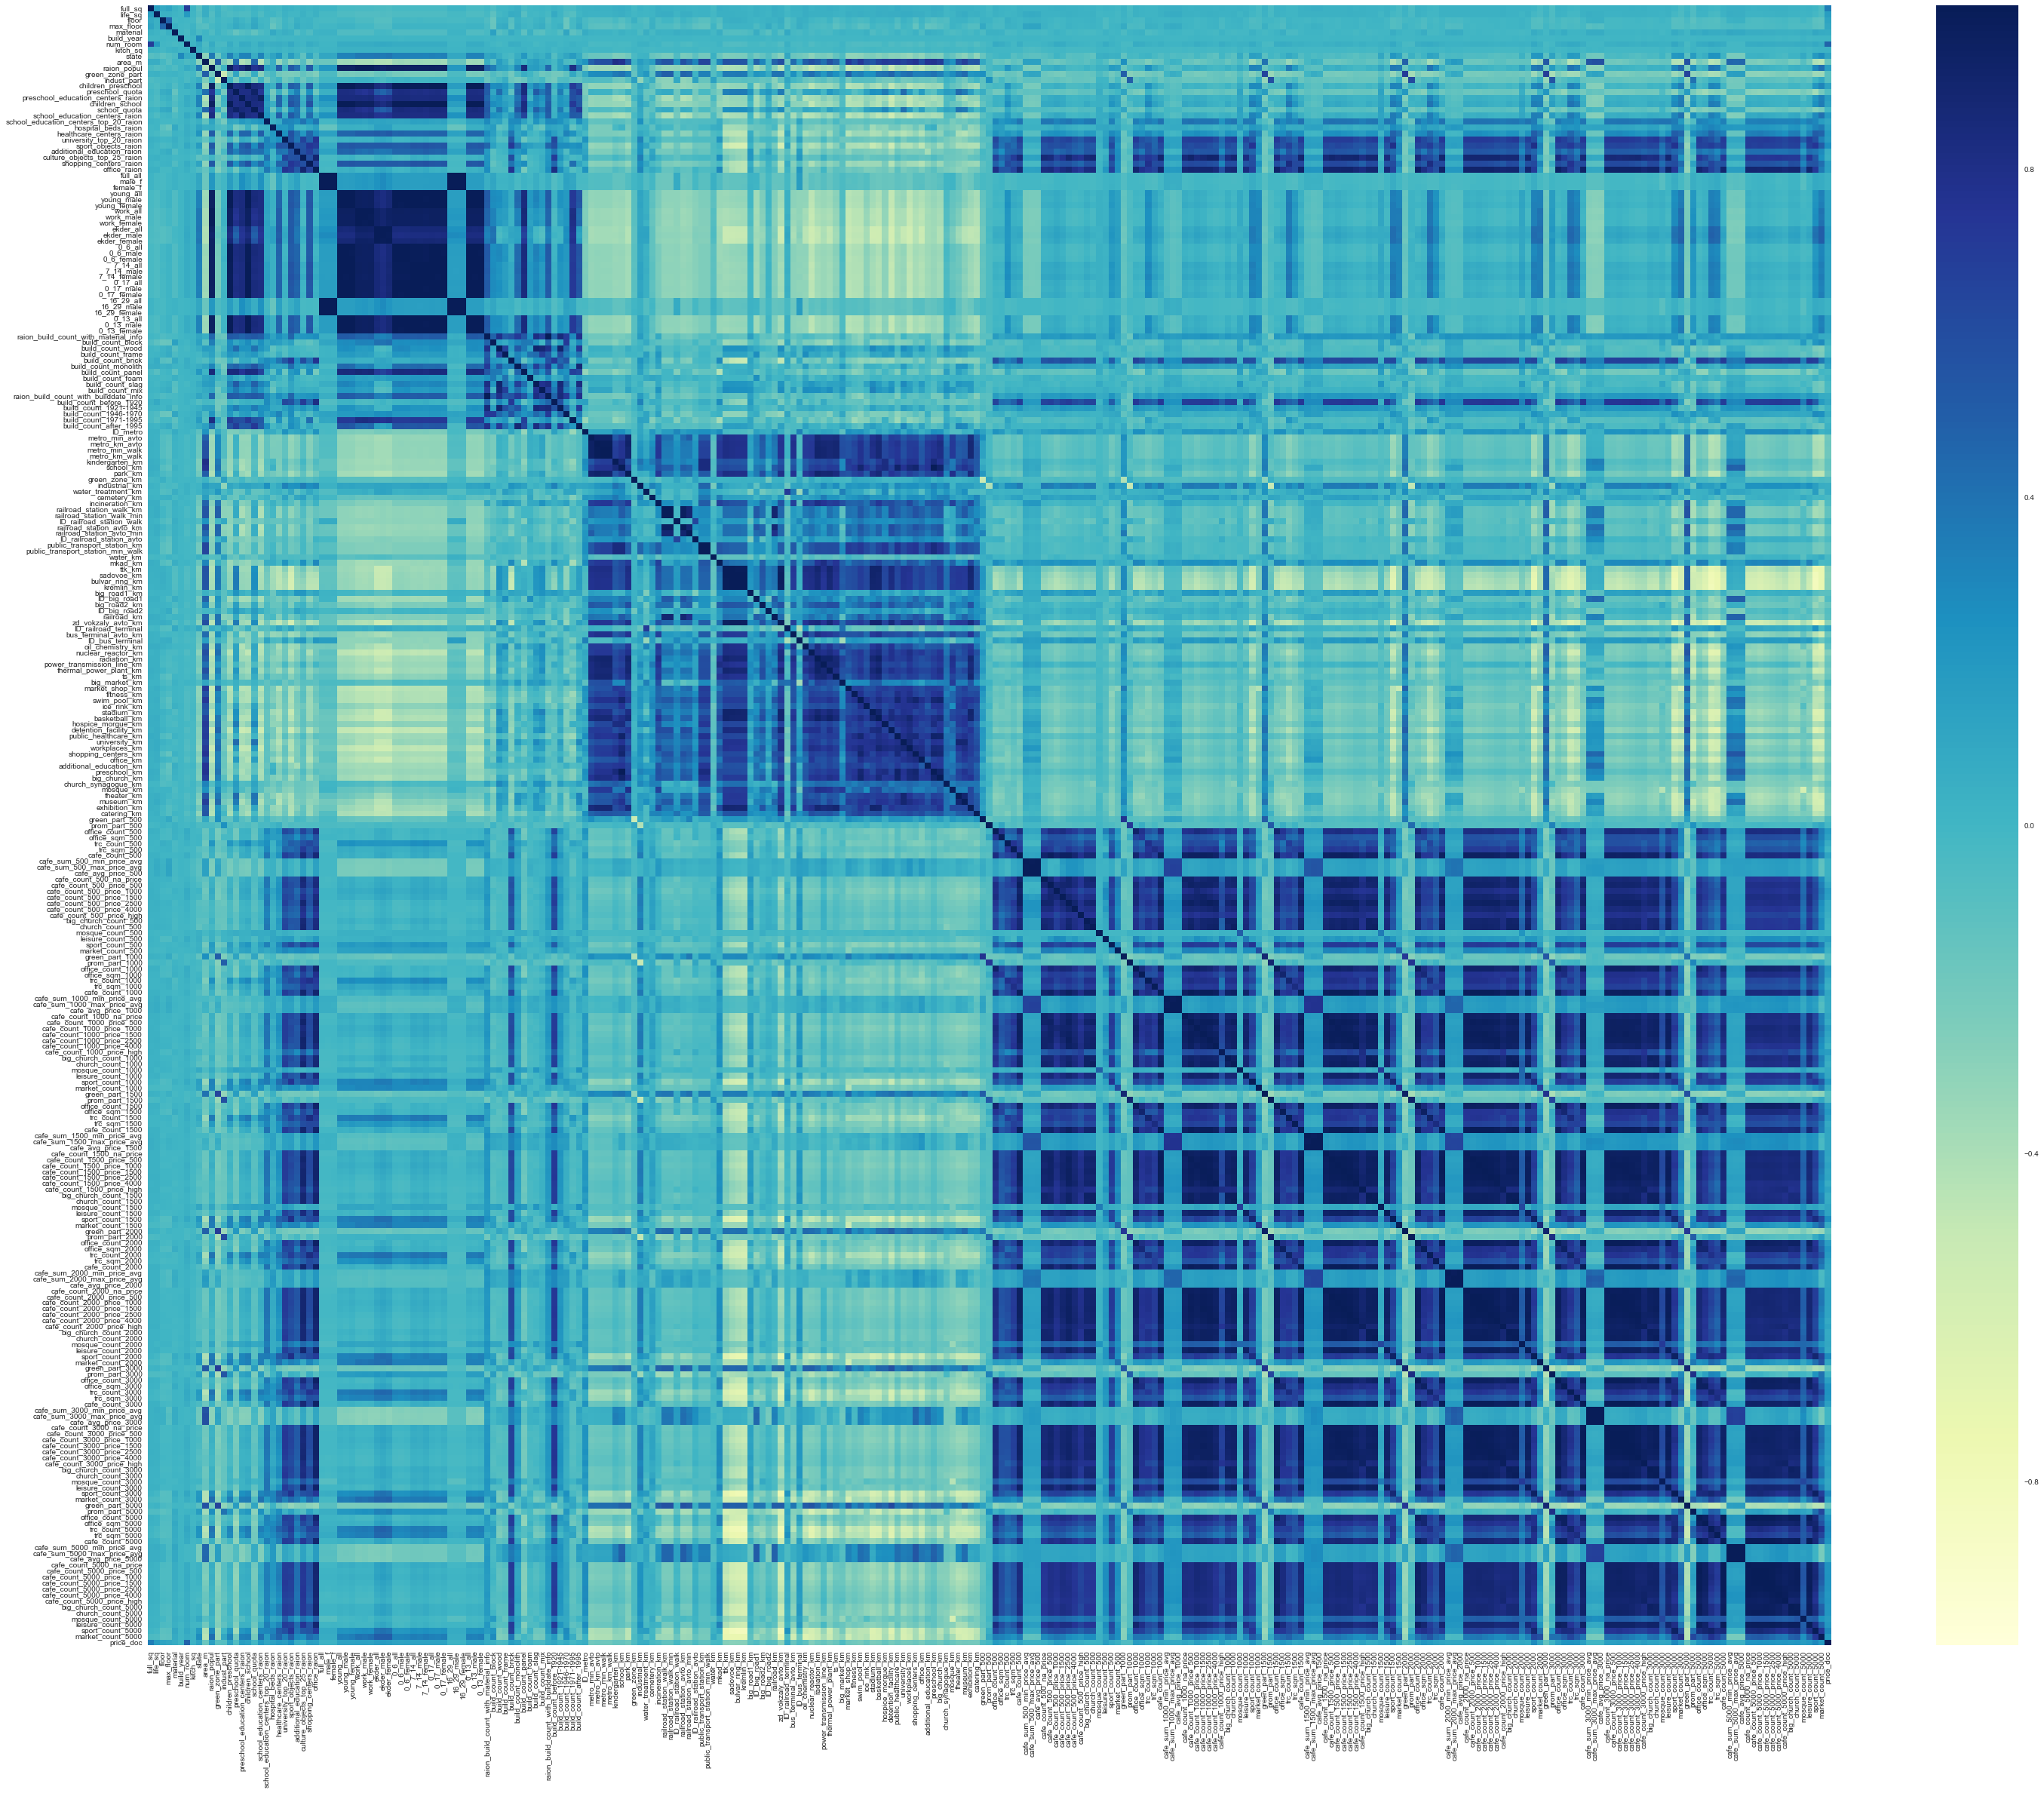

In [5]:
#We will drop id column from the data as it will not be useful for the model, as its just a unique value
#Lets print the correlation between the price_doc - i.e the target variable and all the other variable
#As we can see there are too many columns and no way of knowing which of them are really correlated, we will use heatmap
#to visluaize the same. 
#Also, we will find the top 10 and bottom 10 correlated variable
housedf.drop(['id'], inplace=True, axis=1)
org_fig1, org_fig2 = plt.rcParams["figure.figsize"]
plt.rcParams['figure.figsize'] = [50,40]
sns.heatmap(housedf.corr(), cmap="YlGnBu")
plt.rcParams['figure.figsize'] = [org_fig1, org_fig2]


#We can see that the num_room, full_sq are highly correlated and it makes sense as the bigger the house, the more 
#going to cost, similarly the house closer to detention_facility, nuclear_reactor, kermlin are costing less i.e have a
#negative correlation with the price
house_corr = housedf.corr()
print(house_corr['price_doc'].sort_values(ascending = False)[:10])
print(house_corr['price_doc'].sort_values(ascending = False)[-10:])

This dataset contains macroeconomic and neighbourhood features too, so we will first try to see the explore the 
full_sq, life_sq, floor, max_floor, material, build_year, num_room, kitch_sq, state, sub_area
But before doing that, as we can see from the missing values, most of them have a lot of missing values in them,
so we would need to find a way to fill the missing values, normal way would be to fill it with 0, but this will
severly impact the model and also it doesnt make sense. 

Total unique sub_area 146
Total sub_area greater than mean 72


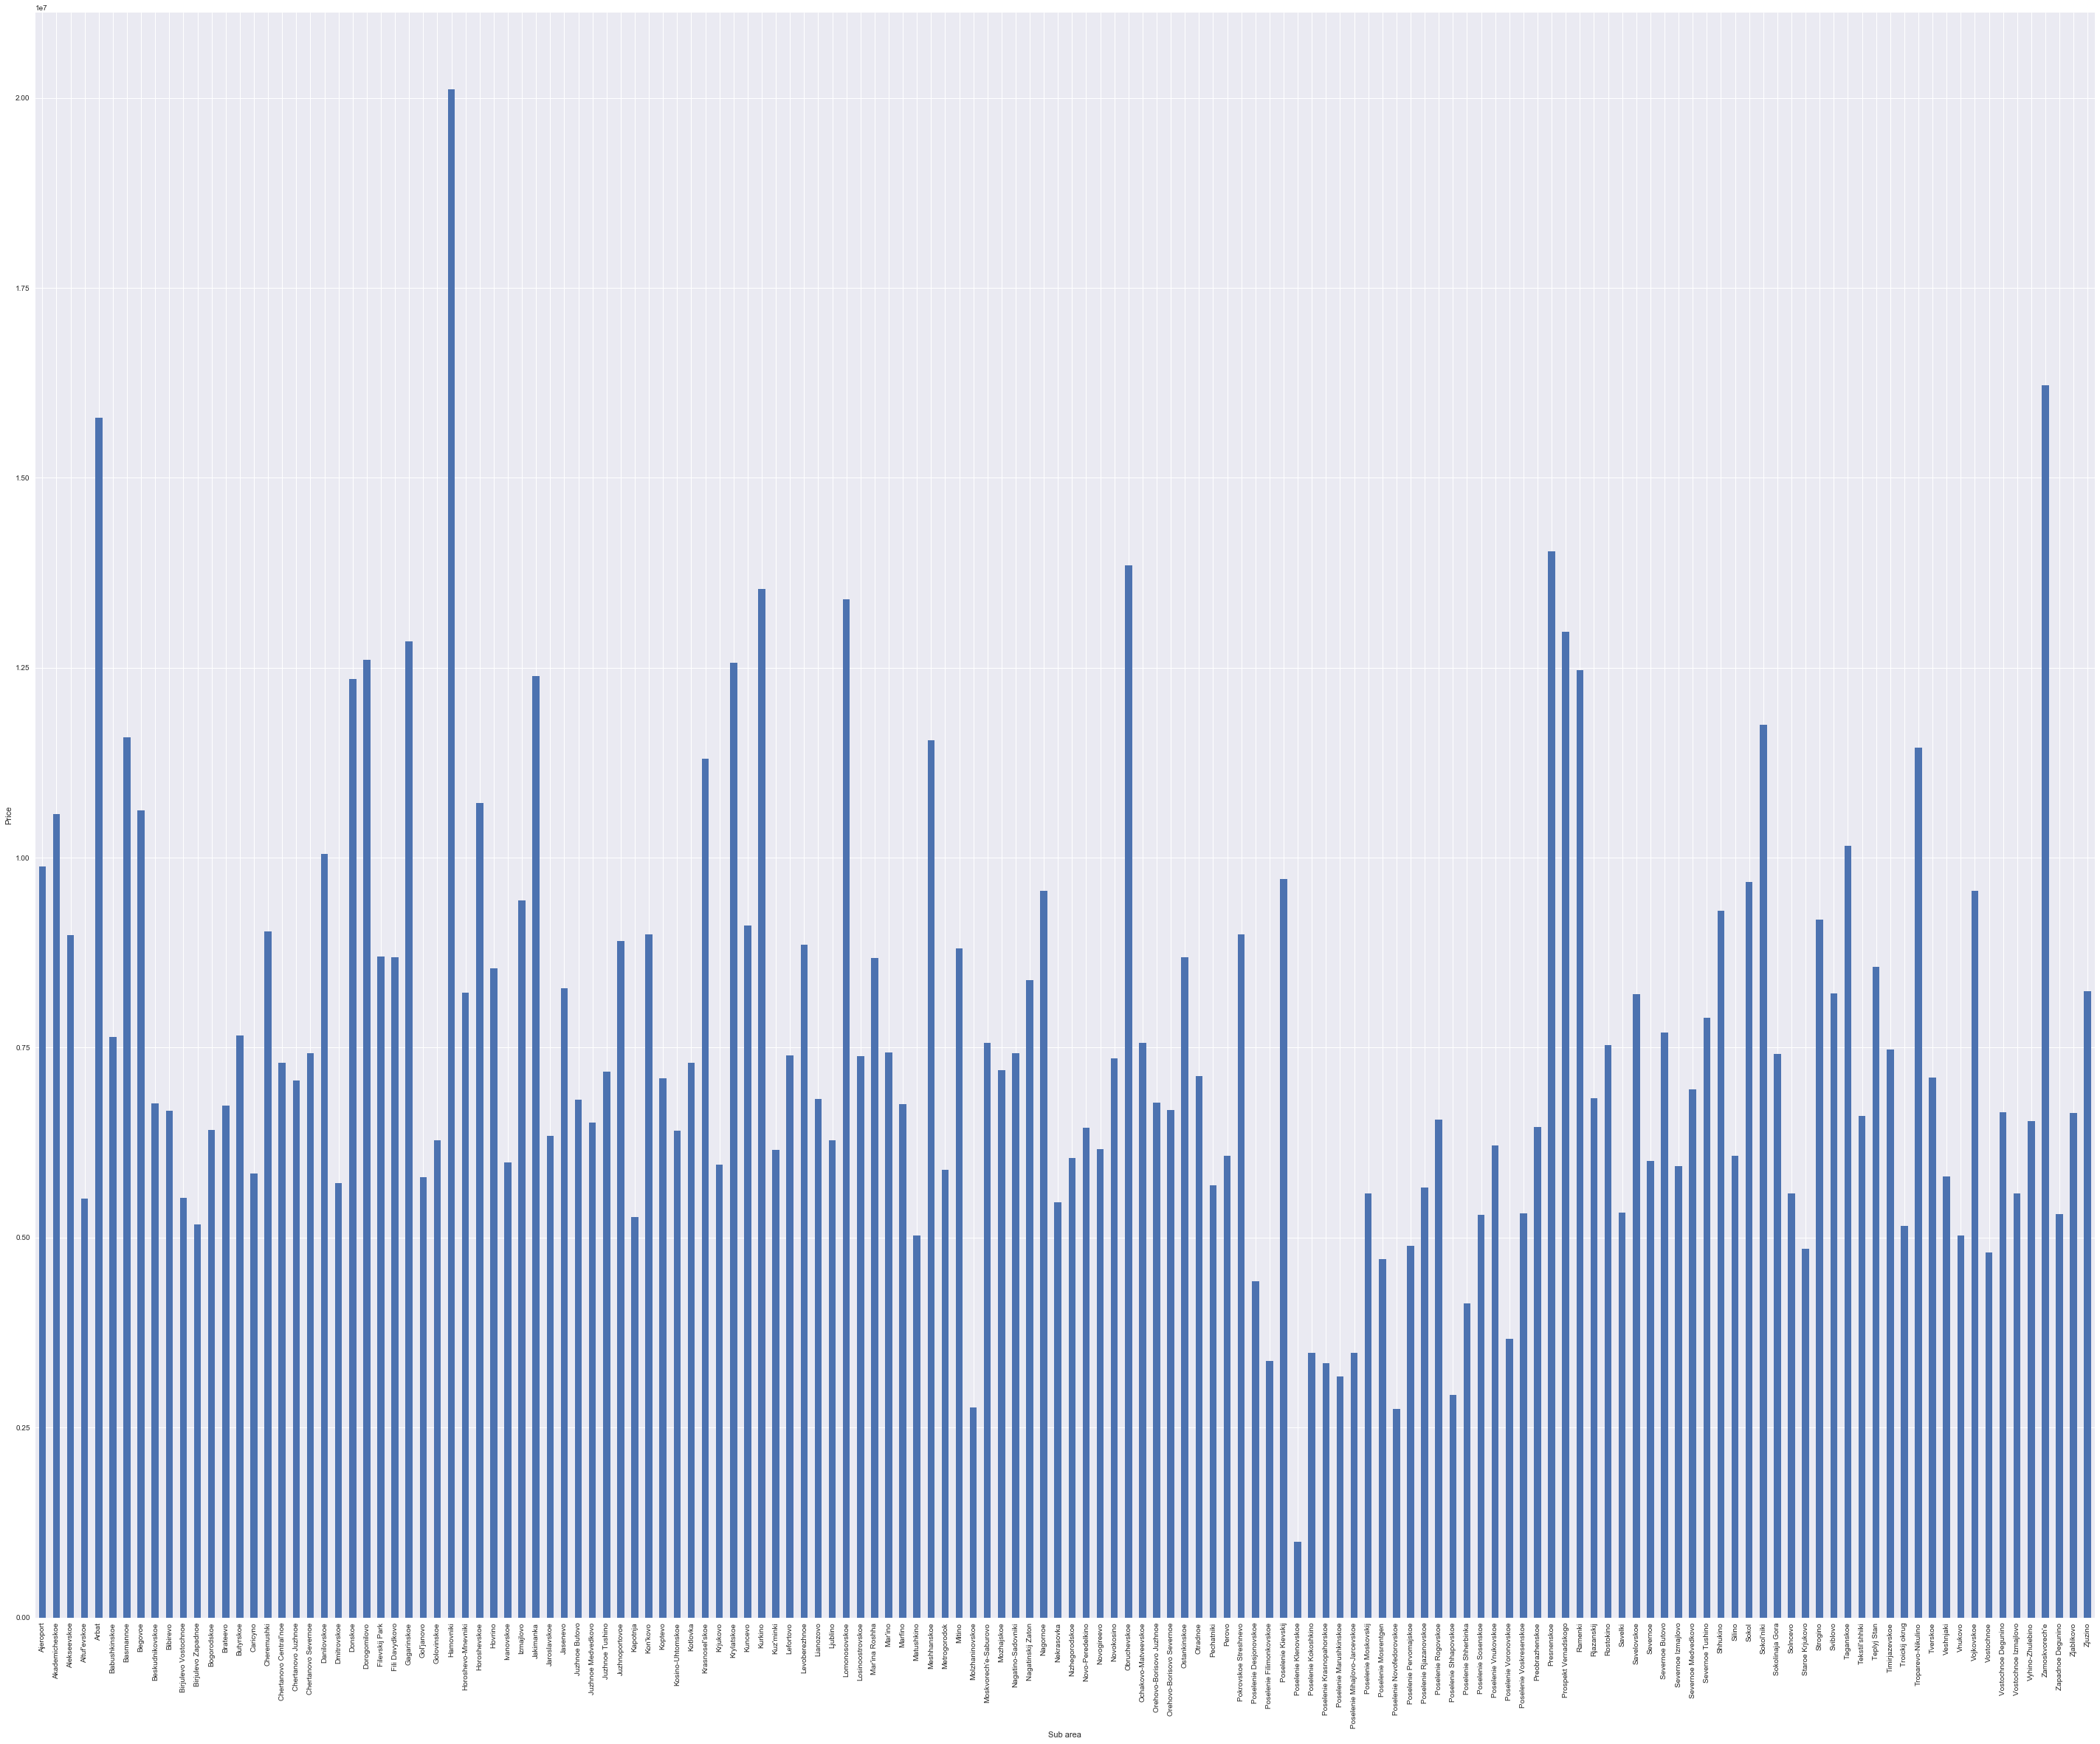

In [6]:
#There are 146 unique sub-areas and out of which almost half of areas have price greater than the 
#mean house value
housedf_sub = housedf.groupby('sub_area')['price_doc'].mean() 
plt.rcParams['figure.figsize'] = [50,40]
housedf_sub.plot(kind='bar')
plt.xlabel('Sub area')
plt.ylabel('Price')
plt.rcParams['figure.figsize'] = [org_fig1, org_fig2]
print("Total unique sub_area {}".format(len(housedf_sub)))
print("Total sub_area greater than mean {}".format(len(housedf_sub[housedf_sub > housedf['price_doc'].mean()])))

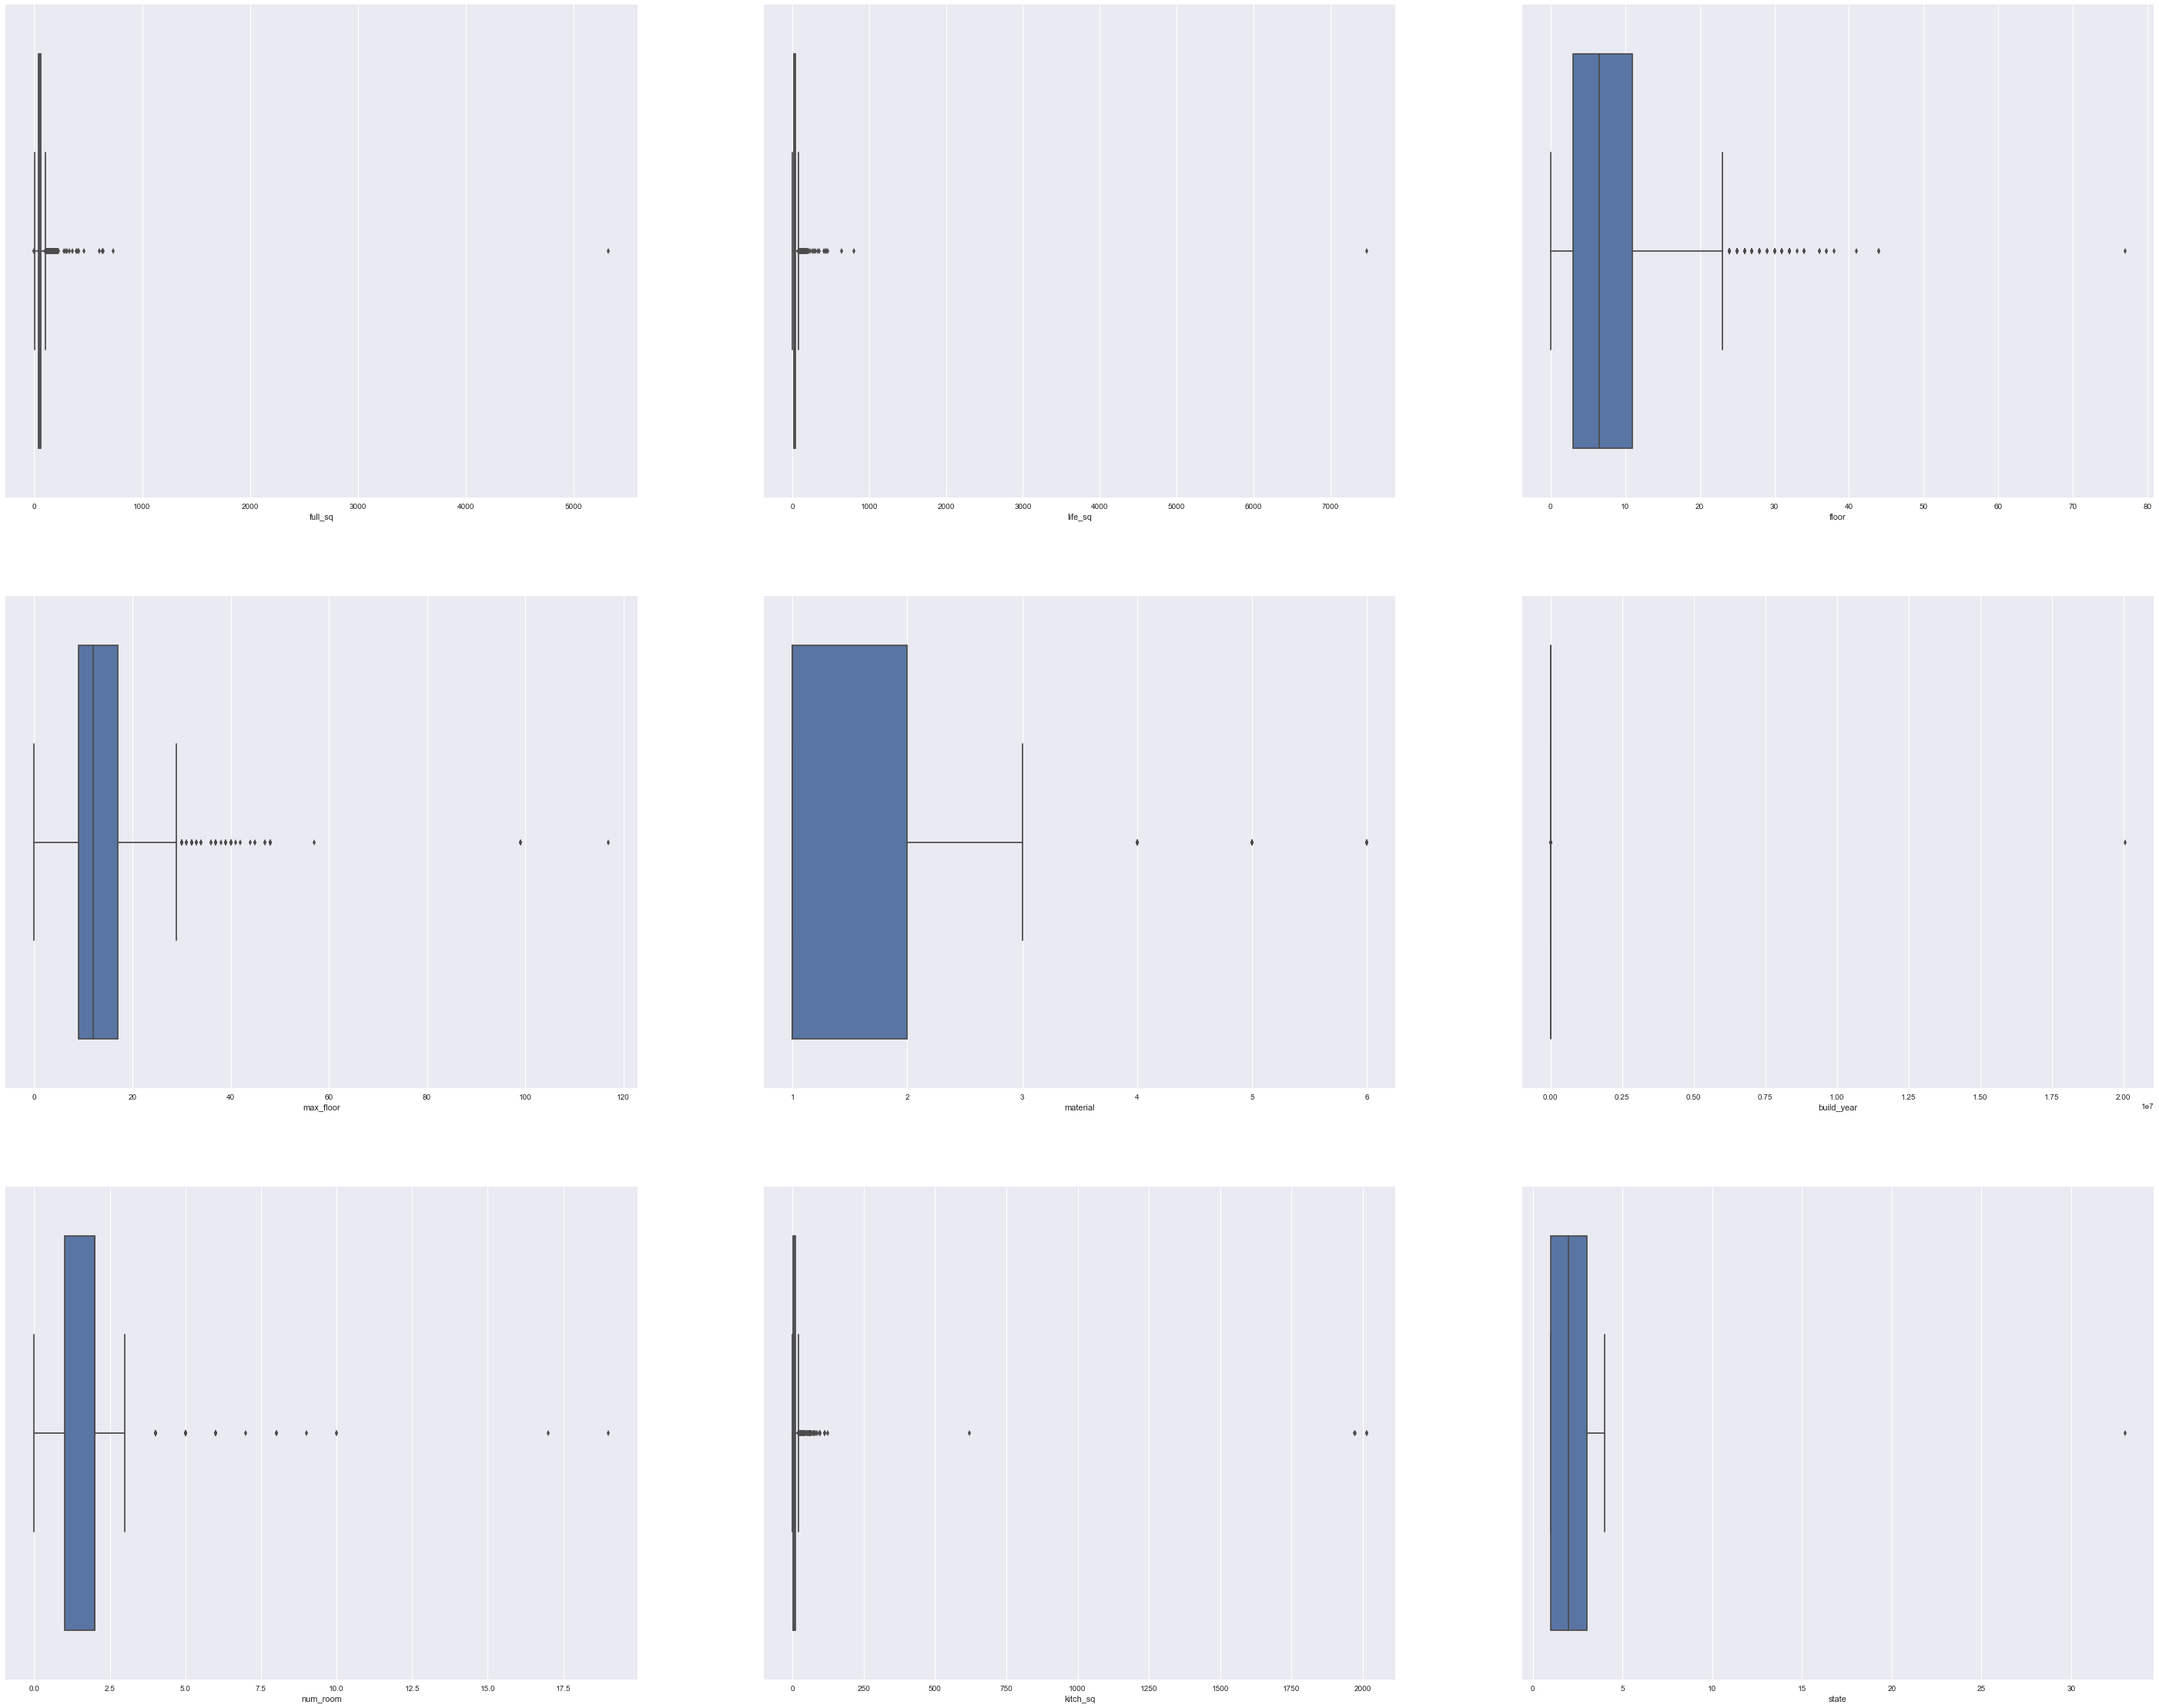

In [7]:
#Lets observe other features
#As we can see there are lot of outliers/wrong values in the dataset, we would need to clean that up as well
plt.rcParams['figure.figsize'] = [50,40]
plt.subplot(3,3,1)
sns.boxplot(housedf['full_sq'].dropna())

plt.subplot(3,3,2)
sns.boxplot(housedf['life_sq'].dropna())

plt.subplot(3,3,3)
sns.boxplot(housedf['floor'].dropna())

plt.subplot(3,3,4)
sns.boxplot(housedf['max_floor'].dropna())

plt.subplot(3,3,5)
sns.boxplot(housedf['material'].dropna())

plt.subplot(3,3,6)
sns.boxplot(housedf['build_year'].dropna())

plt.subplot(3,3,7)
sns.boxplot(housedf['num_room'].dropna())

plt.subplot(3,3,8)
sns.boxplot(housedf['kitch_sq'].dropna())

plt.subplot(3,3,9)
sns.boxplot(housedf['state'].dropna())
plt.rcParams['figure.figsize'] = [org_fig1, org_fig2]

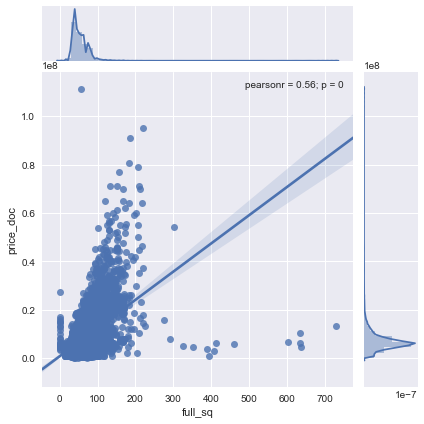

In [8]:
#As seen above there are quite a few features who have a large number of outliers and these will severly impact
#the model, lets check it out. full_sq has one outlier, after removing that if we see the data again, we can see
#the full_sq is highly correleated to price_doc and a good linear model can be helpful to make predictions.
newhousedf = housedf.copy()
todel = newhousedf[newhousedf['full_sq'] > 1000].index.tolist()
todel1 = newhousedf[newhousedf['kitch_sq'] > 500].index.tolist()
todel2 = newhousedf[newhousedf['life_sq'] > 1000].index.tolist()
finaldel = todel + todel1 + todel2
newhousedf.drop(newhousedf.index[finaldel], inplace=True)
sns.jointplot('full_sq','price_doc', data=newhousedf, kind='reg')

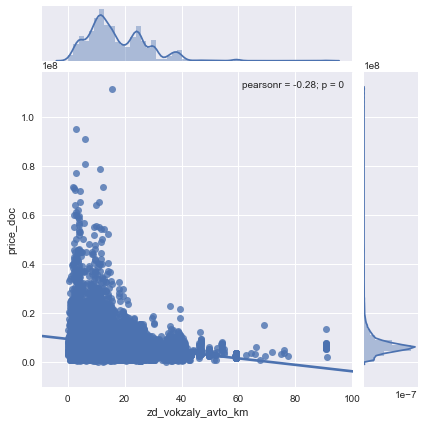

In [9]:
sns.jointplot('zd_vokzaly_avto_km','price_doc', data=newhousedf, kind='reg')

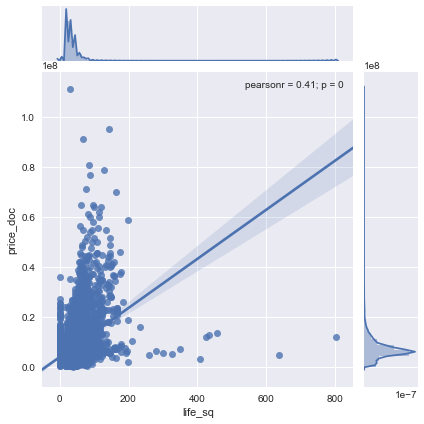

In [10]:
sns.jointplot('life_sq','price_doc', data=newhousedf, kind='reg')

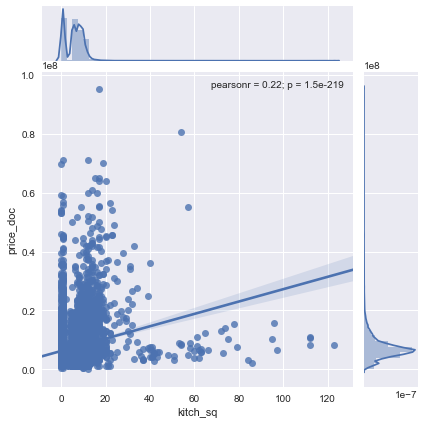

In [11]:
sns.jointplot('kitch_sq','price_doc', data=newhousedf, kind='reg')

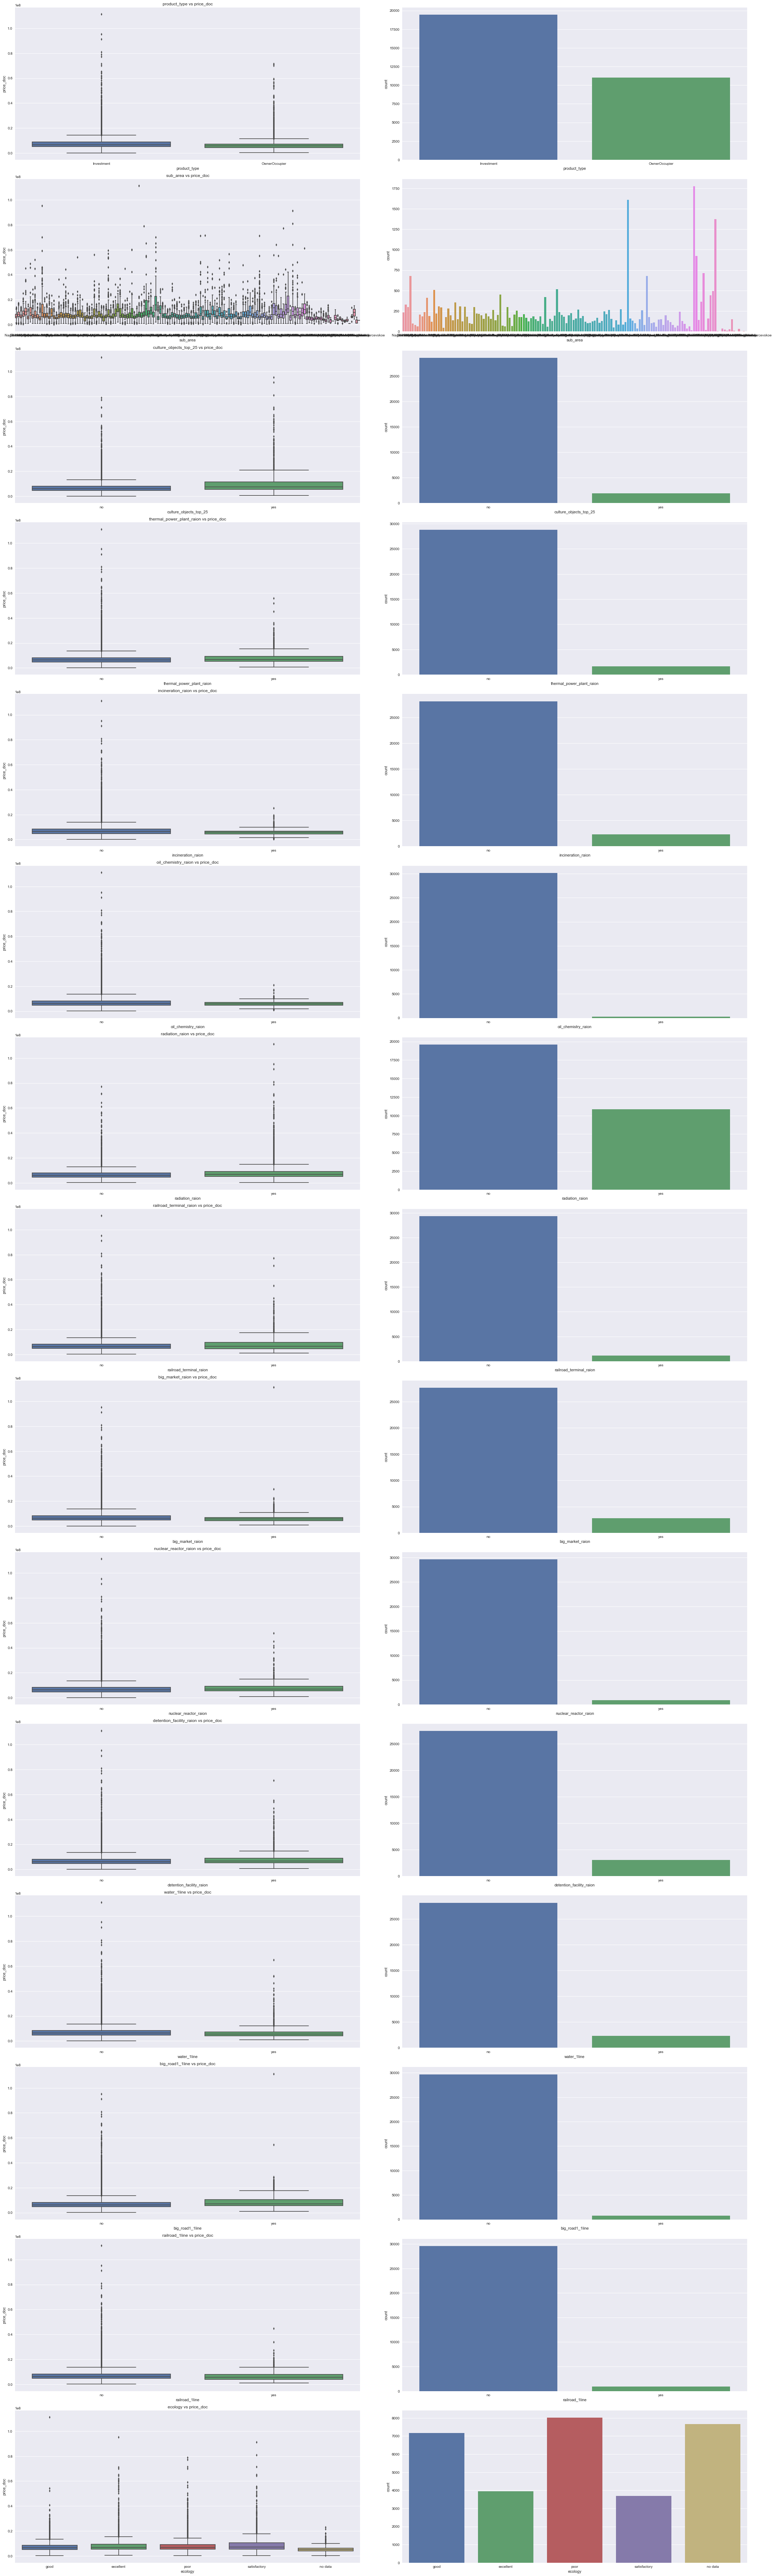

In [12]:
#Lets visualize how the categorical data is distributed and what are the value counts, this will give us more insight
#into how the values are wrt to price_doc
#Except sub_area, the price_doc's median is in the same range for various categories in a feature
#Also, we can see this contains a lot of outliers and dealing with each and every single one of them will be difficult

plt.rcParams['figure.figsize'] = [50,40]
plt.subplots(15, 2,figsize=(30, 100))
cat_columns = housedf.select_dtypes(exclude=[np.number]).columns
x = range(1,31,2)
y = range(2,31,2)
z = range(0,15,1)
for i, j, k in zip(x,y,z):
    plt.subplot(15,2,i)
    sns.boxplot(x=cat_columns[k+1], y='price_doc', data=newhousedf).set_title(cat_columns[k+1] +' vs price_doc')
    plt.subplot(15,2,j)
    sns.countplot(x=cat_columns[k+1],data=newhousedf)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.rcParams['figure.figsize'] = [org_fig1, org_fig2]

In [13]:
#Lets convert the categorical values into one-hot encoded values so that we can use the values of sub_area, 
#product_type into our dataset 
num_columns = newhousedf.select_dtypes(include=[np.number])
for num in num_columns:
    print("unique value's in {} are {}".format(num, len(newhousedf[num].unique())))
#As seen, there are some numerical values which are like categorical values, and having them in their original
#form will affect the model, but instead if we can try and remove the effect of those numerical values, then
#it will help to reduce the effect
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')
maindf = pd.DataFrame()
for col in ['material', 'state']:
        temp = imputer.fit_transform(newhousedf[col].reshape(-1,1))
        newhousedf.drop([col], inplace=True, axis=1)
        newhousedf[col] = temp
        newhousedf[col] = newhousedf[col].astype('category')
for col in cat_columns.tolist() + ['material', 'state']:
    if col not in 'timestamp':
        maindf[col] = newhousedf[col]
        finalhousedf = pd.get_dummies(maindf)

unique value's in full_sq are 210
unique value's in life_sq are 175
unique value's in floor are 42
unique value's in max_floor are 50
unique value's in material are 7
unique value's in build_year are 120
unique value's in num_room are 14
unique value's in kitch_sq are 70
unique value's in state are 6
unique value's in area_m are 146
unique value's in raion_popul are 146
unique value's in green_zone_part are 146
unique value's in indust_part are 132
unique value's in children_preschool are 146
unique value's in preschool_quota are 122
unique value's in preschool_education_centers_raion are 13
unique value's in children_school are 146
unique value's in school_quota are 126
unique value's in school_education_centers_raion are 14
unique value's in school_education_centers_top_20_raion are 3
unique value's in hospital_beds_raion are 80
unique value's in healthcare_centers_raion are 7
unique value's in university_top_20_raion are 4
unique value's in sport_objects_raion are 24
unique value's 

unique value's in big_church_count_2000 are 63
unique value's in church_count_2000 are 95
unique value's in mosque_count_2000 are 2
unique value's in leisure_count_2000 are 52
unique value's in sport_count_2000 are 53
unique value's in market_count_2000 are 9
unique value's in green_part_3000 are 3924
unique value's in prom_part_3000 are 3061
unique value's in office_count_3000 are 395
unique value's in office_sqm_3000 are 4281
unique value's in trc_count_3000 are 65
unique value's in trc_sqm_3000 are 3419
unique value's in cafe_count_3000 are 877
unique value's in cafe_sum_3000_min_price_avg are 5164
unique value's in cafe_sum_3000_max_price_avg are 3886
unique value's in cafe_avg_price_3000 are 6088
unique value's in cafe_count_3000_na_price are 112
unique value's in cafe_count_3000_price_500 are 360
unique value's in cafe_count_3000_price_1000 are 358
unique value's in cafe_count_3000_price_1500 are 343
unique value's in cafe_count_3000_price_2500 are 244
unique value's in cafe_coun

/Users/prajvalb/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]


In [14]:
#Impute the remainig numeric columns if there are any other non-null values
for col in newhousedf.columns.tolist():
    if newhousedf[col].isnull().sum() > 0:
        temp = imputer.fit_transform(newhousedf[col].reshape(-1,1))
        newhousedf.drop([col], inplace=True, axis=1)
        newhousedf[col] = temp

#Check if there are any left after imputing the columns
for col in newhousedf.columns.tolist():
    if newhousedf[col].isnull().sum() > 0:
        print(col)
#Drop the not required columns and finally join the one-hot encoded values to the final newhousedf, which 
#can be used for testing for model
for col in cat_columns.tolist()+['material','state']:
    if col in newhousedf.columns.tolist():
        newhousedf.drop([col], inplace=True, axis=1)
norm_newhousedf = newhousedf.join(finalhousedf)

/Users/prajvalb/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description

### Linear Model
#### Least Squares
In linear model, we need to reduce the difference between the actual value and the predicted values, to do so we define a error function, which we need to reduce.
$$
\wv^* = \arg\min_\wv \sum_{i=1}{N} \Big( f(\xv_i; \wv) - t_i \Big)^2
$$
We can solve this by, setting derivative with respect to w to zero. After solving this we will get the normal function
$$
\begin{align}
\\
\wv &= \big(\Xm^\top \Xm\big)^{-1} \Xm^\top \Tm
\end{align}
$$
So, X is our dataset and T is the target variable.

**Implementation** <br>
In LinearRegress class, we are initialising the base class LinearModel(this initilization w to None)
We have to methods, **train** and **use**, which we will be using to train our model and predict the values respectively.<br>
In **train**, we need to figure out the value of w, which we know is the equation of normal function, this is what we have implemented in the **train** and we assign the value of w and use this to predict the new values.<br>

#### Least Mean Square
Why LMS ? In Least Squares, we are using the whole dataset to calculate the value of w, this can be very costly if the dataset is large. In LMS, what we do is use one sample of dataset at a time and try to coverge to the ideal value of w, where we will have less error.
$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \nabla E_k 
$$

where $E_k$ is the error for the $k$'th sample and $\alpha$ is a learning rate. 
This is called *stochastic gradient descent* or *sequential gradient descent*. 

Solving this, we get:
$$
\wv^{(k+1)} = \wv^{(k)} - \alpha \Big( {\wv^{(k)}}^\top \xv_k - t_k \Big) \xv_k.
$$
where, $\wv^{(k+1)}$ value is updated based on the error of between kth sample of the data.<br>

**Implementation**<br>
In LMS class, when we are creating a model, we need to pass the alpha value, i.e the learning rate.
We have three methods, **train**, **train_step**, **use**.<br>
For, each dataset sample, we calculate the value of w and keep updating till we converge.<br>
**train** will call **train_step** for each sample, and we will add one to x(calculating bias) and then we will initiliase w(one time) and the we will, calculate the value for $\wv^{(k+1)}$ and keep updating it till it converges.<br>
**use** will return the dot product of X and w i.e. is the predicted value.


### Super Classs Definition

In [15]:
import numpy as np 
np.random.seed(None)
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [16]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X1 = self.add_ones(X)
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T 
        pass  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X1 = self.add_ones(X)
        return X1 @ self.w
        pass  ## TODO: replace this with your codes

### Least Mean Squares

In [17]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
         
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
            self.train_step(x, t)
        pass  ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):  
        x = self.add_ones(x.reshape(1,-1))
        if self.w is None:
            self.w = np.zeros(x.shape[1])
            self.w = self.w.reshape(1,-1)
        y = x @ self.w.T
        self.w = self.w - self.alpha * (y - t) * x
        pass  ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):
        X1 = self.add_ones(X)
        return X1 @ self.w.T
        pass  ## TODO: replace this with your codes
        

### Usage Examples

In [18]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

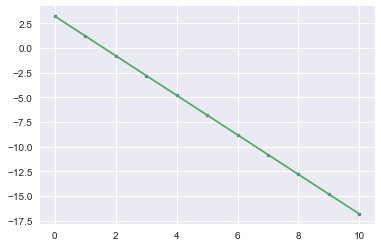

In [19]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)
plt.plot(T, '.')
plt.plot(ls.use(X))

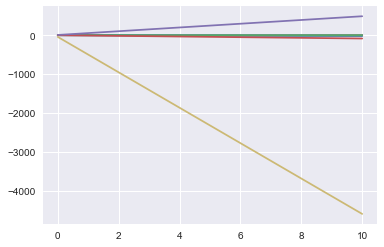

In [20]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

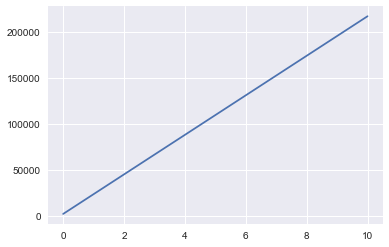

In [21]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply two methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


#### Methods
For the purpose of experiments we are defining certain functions:<br>
**plot_results**<br>
    -This function will plot the results of actual vs predicted values for the test dataset<br>
**ready_data**<br>
    -This function will divide the data into test data and train data, by default this will split the data into 80% train and 20% test<br>
**normalise_data**<br>
    -This function will normalise the data using the MinMaxSacler i.e rescales the data so that all the features are in range(0,1)<br>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Plot results of actual values vs predicted values 
def plot_results(y, predicted_y, rmse_val):
    plt.rcParams['figure.figsize'] = [20,15]
    plt.subplot(1,2,1)
    plt.plot(y)
    plt.ylabel("Actual Values")
    plt.subplot(1,2,2)
    plt.plot(predicted_y)
    plt.ylabel("Predicted Values")
    rmse_str = "RMSE Val: " + str(rmse_val)
    plt.title(rmse_str)
    plt.rcParams['figure.figsize'] = [org_fig1, org_fig2]

def ready_data(df, y, norm=False):
    tempdf = df.copy()
    if norm == False:
        tempdf.drop(['price_doc'], inplace=True, axis=1)
    Xtrain, Xtest, Ttrain, Ttest = train_test_split(tempdf, y, random_state=42)
    return Xtrain, Xtest, Ttrain, Ttest

def normalize_data(df): 
    tempdf = df.copy()
    y = tempdf['price_doc'].values
    tempdf.drop(['price_doc'], inplace=True, axis=1)
    scalar = MinMaxScaler()
    tempdf1 = scalar.fit_transform(tempdf)
    return tempdf1, y
def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

Lets just first plot with numerical data from the newhousedf and see the results.
As we can see we are getting a exteremly high RMSE and this clearly isnt fitting the data well.

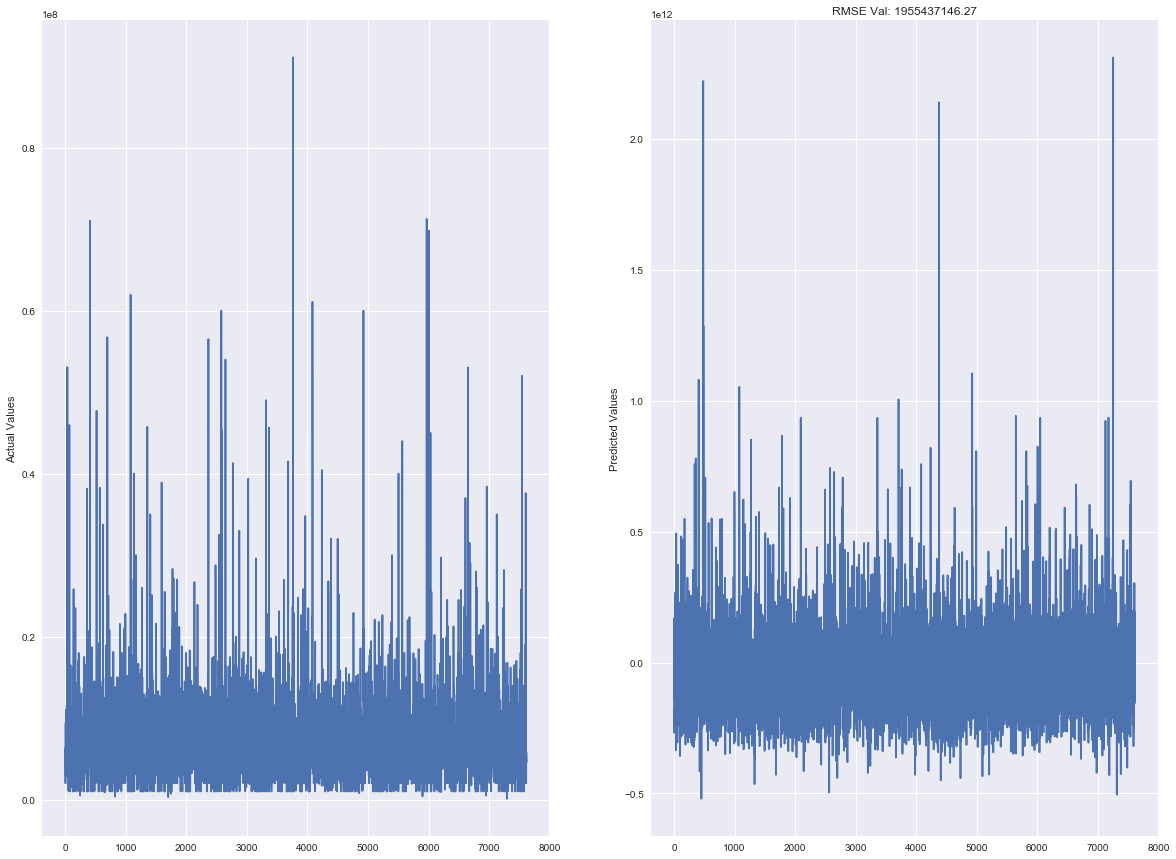

In [25]:
#newhousedf contians only numerical values, categorical values are not in the data.
Xtrain, Xtest, ytrain, ytest = ready_data(newhousedf, newhousedf['price_doc'].values)
ls = LinearRegress()
ls.train(Xtrain,ytrain)
predicted_y = ls.use(Xtest)
rmse_val = rmse(ytest, predicted_y)/len(ytest)
plot_results(ytest, predicted_y, rmse_val)

Lets normalize the data and check if we can see any improvements.
This is bad then what we have seen from the previous data, so need to test with using normalised + categorical

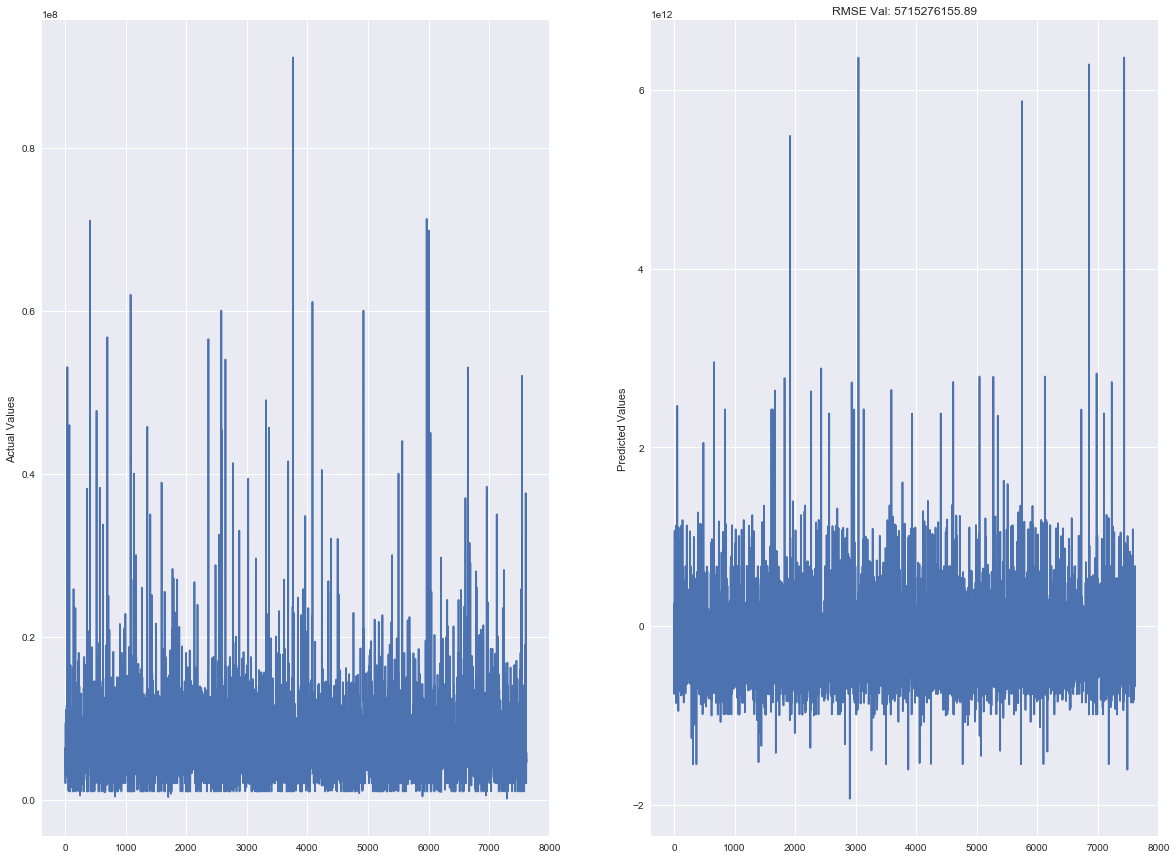

In [26]:
df, y = normalize_data(newhousedf)
Xtrain, Xtest, ytrain, ytest = ready_data(df, y, True)
ls.train(Xtrain,ytrain)
predicted_y = ls.use(Xtest)
rmse_val = rmse(ytest, predicted_y)/len(ytest)
plot_results(ytest, predicted_y, rmse_val)

Better, when we are using non-normalised data with categorical values included.
Normalising, will end up giving us bad results, but still lets give it a try

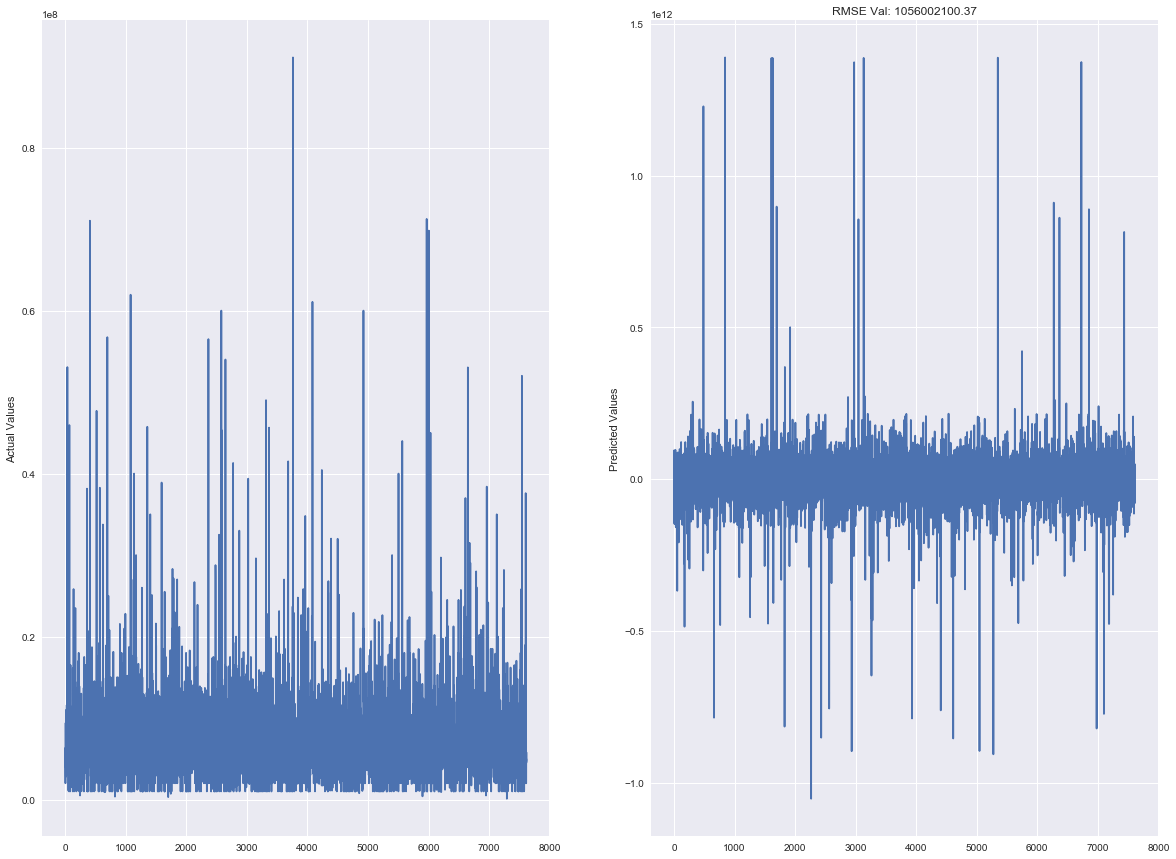

In [27]:
Xtrain, Xtest, ytrain, ytest = ready_data(norm_newhousedf, norm_newhousedf['price_doc'].values, True)
ls.train(Xtrain,ytrain)
predicted_y = ls.use(Xtest)
rmse_val = rmse(ytest, predicted_y)/len(ytest)
plot_results(ytest, predicted_y, rmse_val)

Now using both the normalized and the categorical varaibles together and lets see if get any changes.
Lets use the model.
As expected the results are worst.
So normalising the data is actually having a bad impact ?
Need to think on why ?

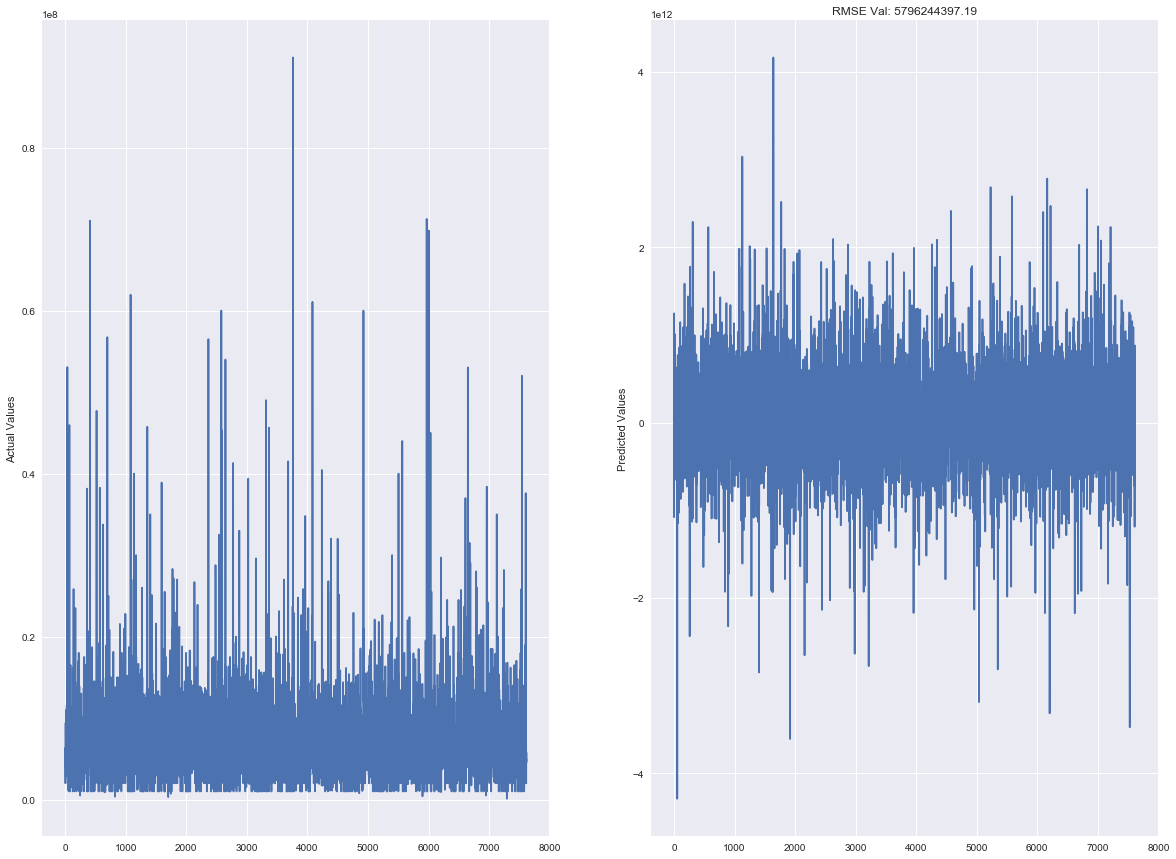

In [28]:
df, y = normalize_data(norm_newhousedf)
Xtrain, Xtest, ytrain, ytest = ready_data(df, y, True)
ls.train(Xtrain,ytrain)
predicted_y = ls.use(Xtest)
rmse_val = rmse(ytest, predicted_y)/len(ytest)
plot_results(ytest, predicted_y, rmse_val)

Now, we move towards using LMS, start will alpha = 0.01
I have seen this issue of singular matrix error, when I am trying to use the StandardScalar with LMS i.re normalising using mean and std deviation.
Lets hope LMS is able to converge and give a better solution.
Also, while using StandardScalar, issues with values going to infinity was encountered, maybe because the StandardScaling was reducing the features to big negative values and it was not converging soon enough.<br>
So, we have improved a lot, using just normalised data and including all the categorical values.

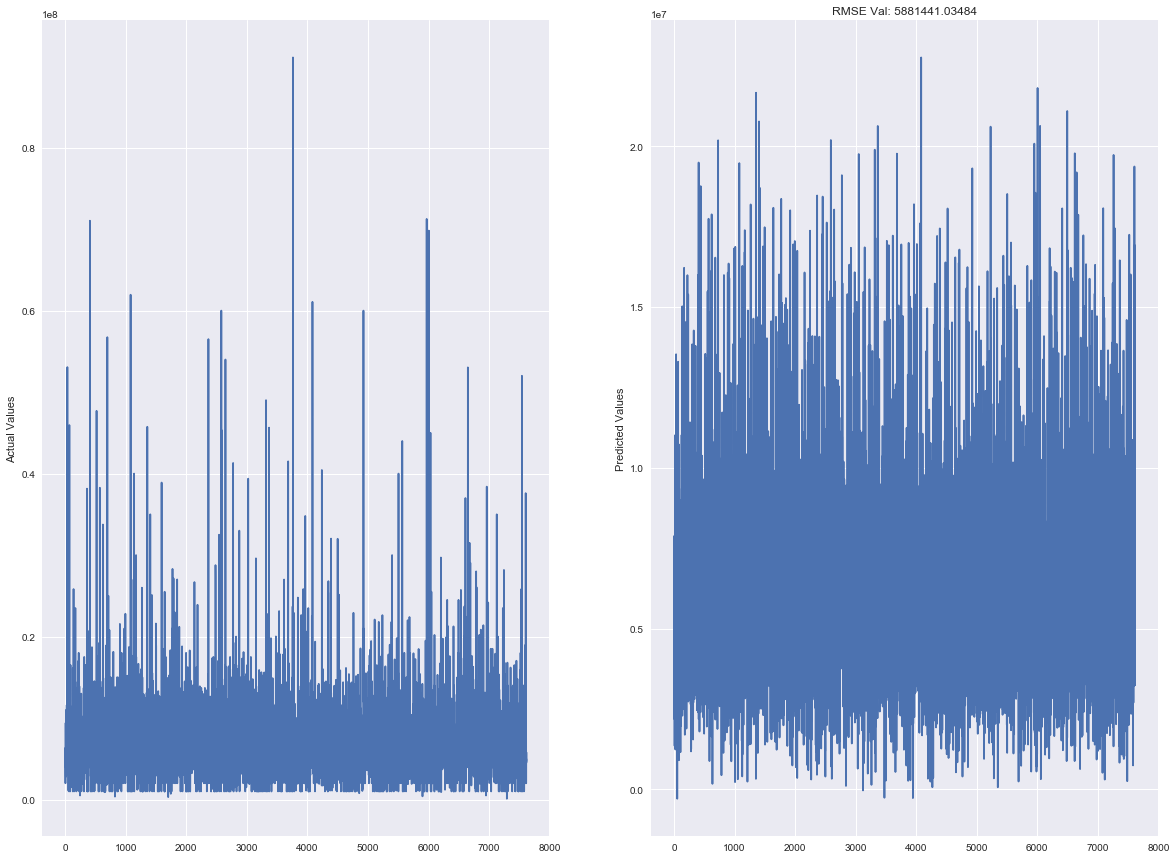

In [29]:
df, y = normalize_data(norm_newhousedf)
Xtrain, Xtest, ytrain, ytest = ready_data(df, y, True)
ls = LMS(0.01)
ls.train(Xtrain,ytrain)
predicted_y = ls.use(Xtest)
rmse_val = rmse(ytest, predicted_y)/len(ytest)
plot_results(ytest, predicted_y, rmse_val)

Not all the features are important and probably, the macroeconomic features given play a less role, lets check that assumpltion out and see if we any improvements in the results.
Also, we are considering multiple alpha values to see if the learning rate impacts our model to converge towards the solution.<br>
So, we have improvement and lets dig more.

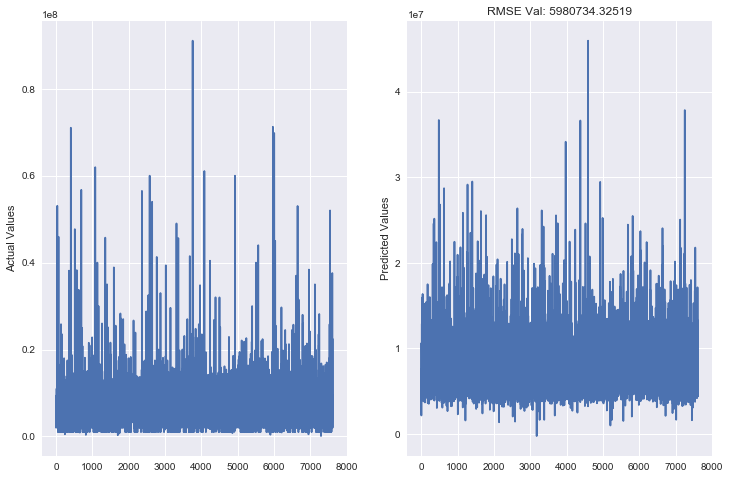

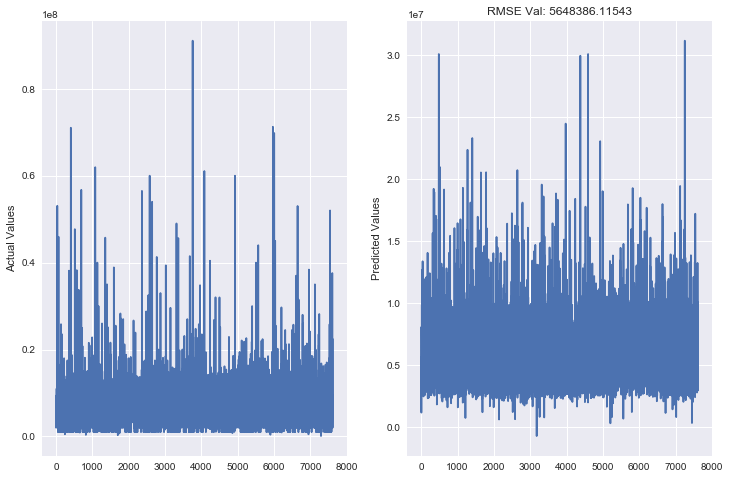

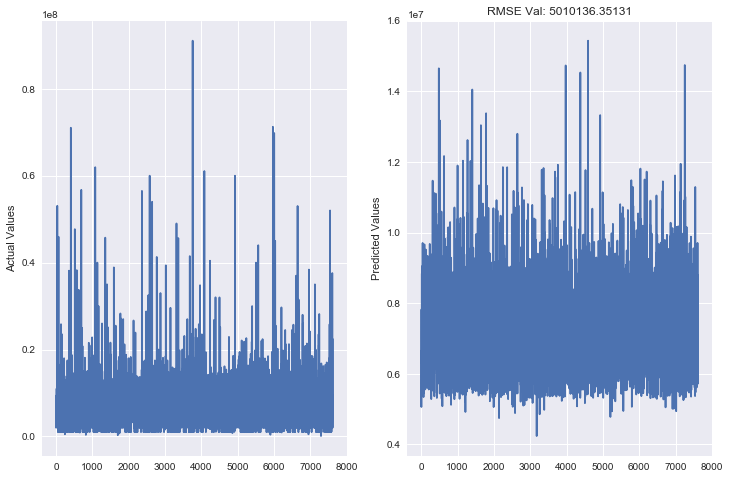

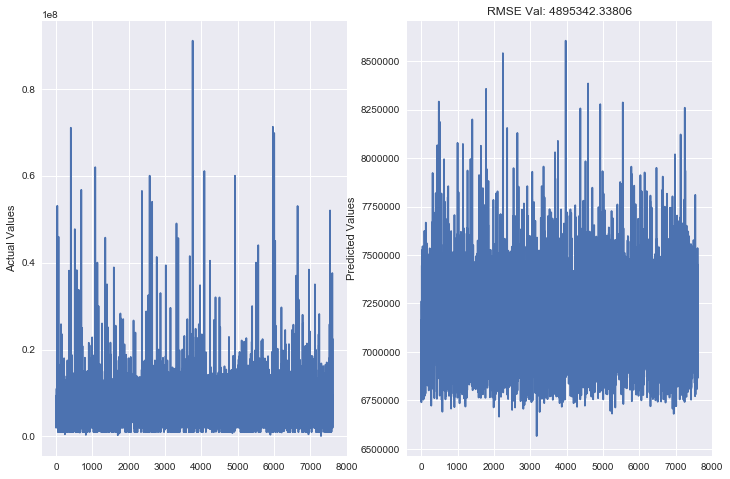

In [30]:
fundamental_cols = ['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
                   'state', 'product_type', 'sub_area', 'price_doc']
testcol = [col for col in fundamental_cols if col in norm_newhousedf.columns.tolist()]
testdf = norm_newhousedf[testcol]

df, y = normalize_data(testdf)
Xtrain, Xtest, ytrain, ytest = ready_data(df, y, True)
alpha = [1, 0.1, 0.01, 0.001]
for a in alpha:
    ls = LMS(a)
    ls.train(Xtrain,ytrain)
    predicted_y = ls.use(Xtest)
    fig = plt.figure(figsize=(12,8))
    rmse_val = rmse(ytest, predicted_y)/len(ytest)
    plot_results(ytest, predicted_y, rmse_val)
  

As seen in data, built_year has too many bad values, which might impact the model and so we will try and remove that and test.
Also, lets include all the categorical columns too, as we have used pd.get_dummies, these columns got renamed and 
we need to get those columns and test too.<br>
No improvements in the result for what we had seen previously.

In [31]:
x = []
finallist = []
for col in norm_newhousedf.columns.tolist():
    x.append([col for c in fundamental_cols if c in col])
for i in x:
    if i != [] and 'sub_area' not in i[0]:
        finallist.append(i[0])

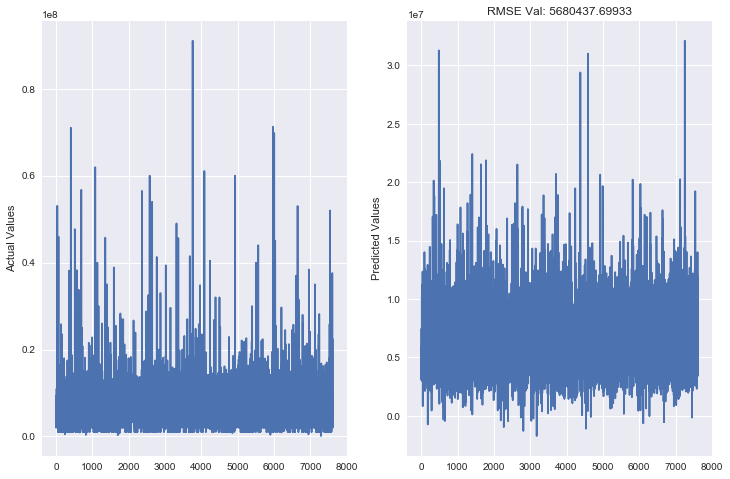

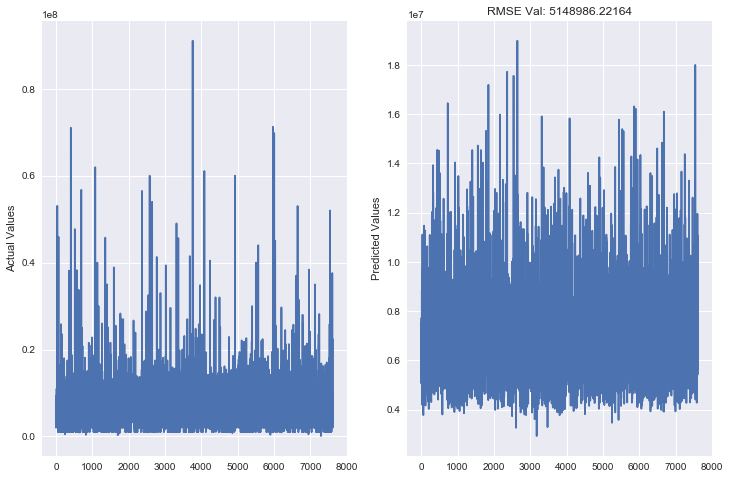

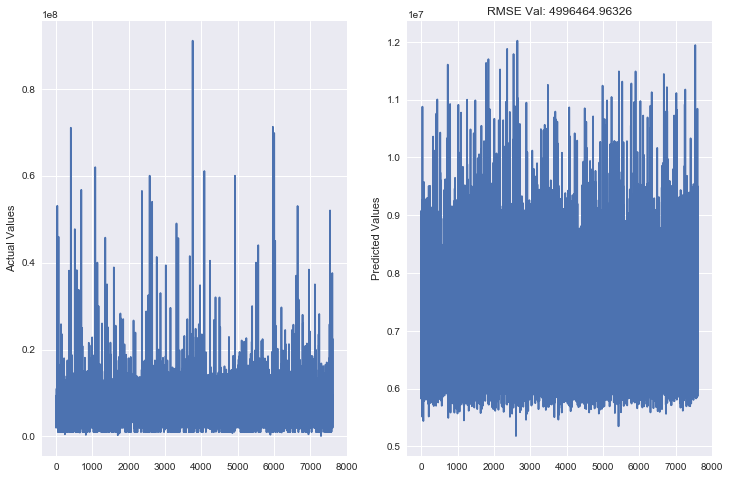

In [32]:
testdf = norm_newhousedf[finallist]

df, y = normalize_data(testdf)
Xtrain, Xtest, ytrain, ytest = ready_data(df, y, True)
alpha = [0.1, 0.01, 0.001]
for a in alpha:
    ls = LMS(a)
    ls.train(Xtrain,ytrain)
    predicted_y = ls.use(Xtest)
    fig = plt.figure(figsize=(12,8))
    rmse_val = rmse(ytest, predicted_y)/len(ytest)
    plot_results(ytest, predicted_y, rmse_val)

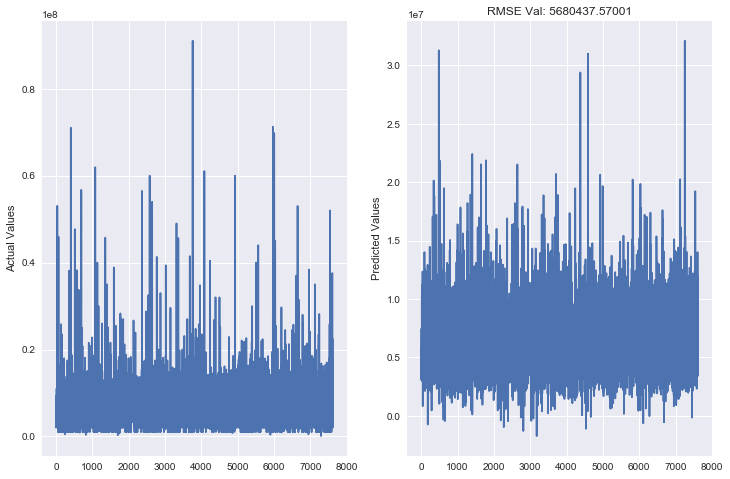

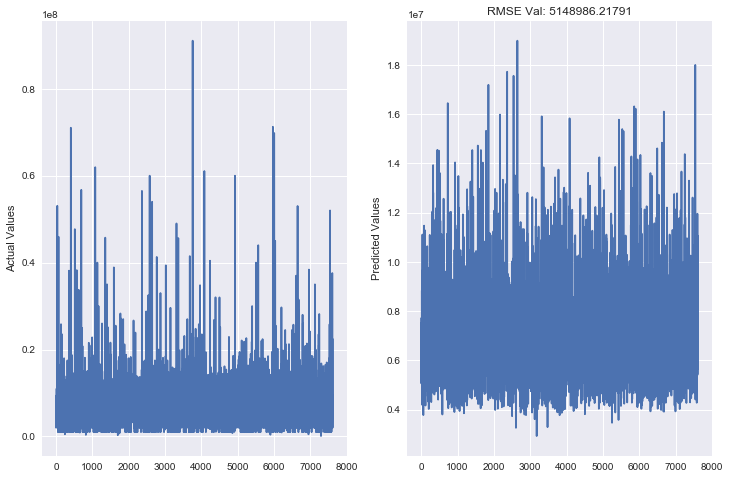

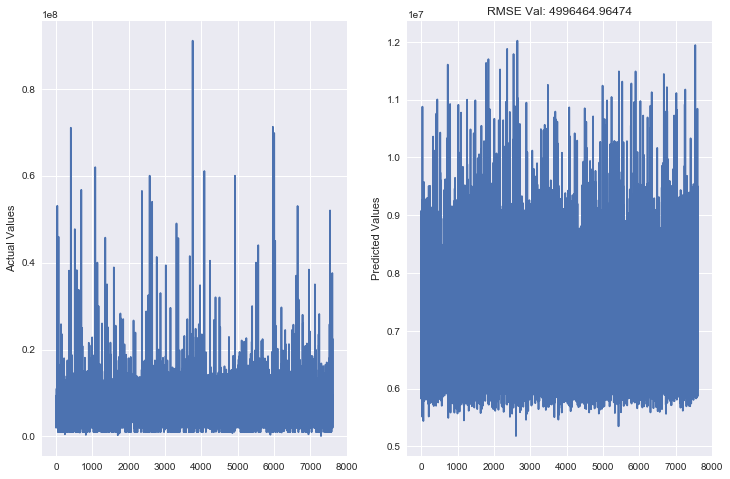

In [33]:
finallist.remove('build_year')
testdf = norm_newhousedf[finallist]

df, y = normalize_data(testdf)
Xtrain, Xtest, ytrain, ytest = ready_data(df, y, True)
alpha = [0.1, 0.01, 0.001]
for a in alpha:
    ls = LMS(a)
    ls.train(Xtrain,ytrain)
    predicted_y = ls.use(Xtest)
    fig = plt.figure(figsize=(12,8))
    rmse_val = rmse(ytest, predicted_y)/len(ytest)
    plot_results(ytest, predicted_y, rmse_val)

Lets, try using the numerical data only and no categorical data.
As expected not much change in the data.

/Users/prajvalb/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in square


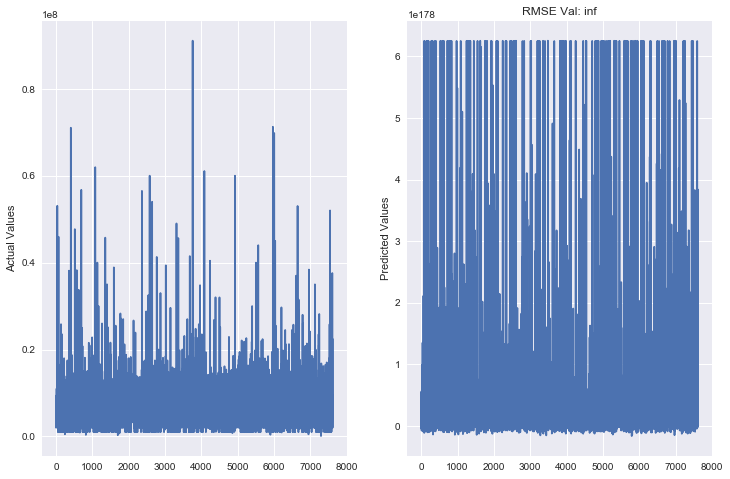

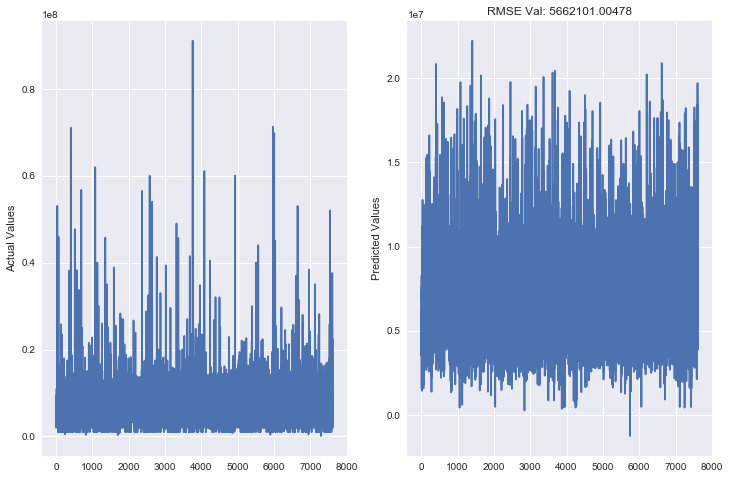

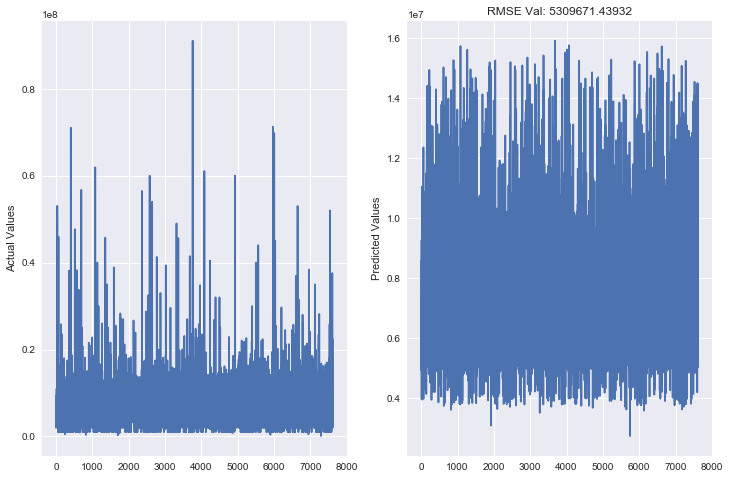

In [34]:
df, y = normalize_data(newhousedf)
Xtrain, Xtest, ytrain, ytest = ready_data(df, y, True)
alpha = [0.1, 0.01, 0.001]
for a in alpha:
    ls = LMS(a)
    ls.train(Xtrain,ytrain)
    predicted_y = ls.use(Xtest)
    fig = plt.figure(figsize=(12,8))
    rmse_val = rmse(ytest, predicted_y)/len(ytest)
    plot_results(ytest, predicted_y, rmse_val)

Analysis and comparison of the models are written as we went about discussin the results using different models,
here are the top ones in my humble opinion:<br>
1. Maybe the data is not that huge, but LeastSquare was quicker than LMS
2. LMS with different alpha values was compared and the optimum value turned out to be 0.001, even lesser values of alpha was checked(till 0.00001) and the results seemed to deteoriate after a certain point.
3. LMS gives better performance, and the LMS model has less RMSE as compared with Least Squares.
4. Singular Matrix error was encounter

# Conclusions

This might be the time to conclude that LinearModel is not the right choice for this data, the data might have polynomial dependence or some other regression model might fit the data properly.
Learned more about using numpy and how to train and test ML models and figure out how features can/cannot impact the models.
Normalization of data is also a must tool to have if we need to make our model improve


# References
<font color='blue'> <b> Seaborn </b> </font> https://seaborn.pydata.org/
<font color='blue'> <b> Kaggle </b> </font> https://kaggle.com
<font color='blue'> <b> Pandas </b> </font> https://seaborn.pydata.org/
<font color='blue'> <b> Numpy </b> </font> http://www.numpy.org
<font color='blue'> <b> Sklearn </b> </font> http://scikit-learn.org/stable/index.html

# Extra Credit

If you want to work more for an extra credit, place your work here about weight analysis. 
Try to answer to the question: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? 
    
    

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

In [35]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        #train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
